In [80]:
import pandas as pd

In [81]:
import datetime as dt

In [82]:
listings_df = pd.read_csv("/home/anatoli/Документы/airbnb/listings.csv")

In [83]:
listings_df["last_scraped"].min()

'2021-02-09'

In [84]:
reviews_df = pd.read_csv("/home/anatoli/Документы/airbnb/reviews.csv")

In [85]:
reviews_df["date"] = pd.to_datetime(reviews_df["date"])

In [86]:
reviews_df = reviews_df[reviews_df["date"] < dt.datetime(2021, 2, 9)].drop(columns="comments").copy()

In [87]:
reviews_df["date"].min()

Timestamp('2009-12-21 00:00:00')

In [88]:
merged_df = reviews_df.merge(listings_df[["id", "neighbourhood_cleansed"]], left_on="listing_id", right_on="id")

In [89]:
merged_df["month"] = pd.to_datetime(merged_df["date"]).dt.month

In [90]:
popularity_df = merged_df.groupby(["neighbourhood_cleansed", "month"])["reviewer_id"].nunique().reset_index()

In [91]:
# total_popularity_df = merged_df.groupby(["month"])["reviewer_id"].nunique().reset_index()
total_popularity_df = popularity_df.groupby(["month"])["reviewer_id"].sum().reset_index()

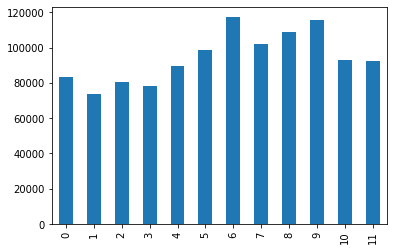

In [92]:
total_popularity_df.sort_values("month", ascending=True)["reviewer_id"].plot(kind="bar")

In [93]:
regions_popularity_df = popularity_df.groupby(["neighbourhood_cleansed"])["reviewer_id"].sum().reset_index()

In [94]:
regions_popularity_df["popularity"] = regions_popularity_df["reviewer_id"] / regions_popularity_df["reviewer_id"].sum()

In [95]:
regions_popularity_df = regions_popularity_df.sort_values("popularity", ascending=False)

In [96]:
regions_popularity_df.iloc[0:10]

,neighbourhood_cleansed,reviewer_id,popularity
32,Westminster,139856,0.123466
5,Camden,95858,0.084624
29,Tower Hamlets,95085,0.083942
21,Lambeth,81308,0.071779
19,Kensington and Chelsea,79962,0.070591
27,Southwark,76240,0.067305
18,Islington,73668,0.065035
11,Hackney,73288,0.064699
12,Hammersmith and Fulham,61179,0.054009
31,Wandsworth,50703,0.044761


In [97]:
popularity_df = popularity_df.merge(total_popularity_df, on="month", suffixes=("", "_total"))

In [98]:
popularity_df["popularity"] = popularity_df["reviewer_id"] / popularity_df["reviewer_id_total"]

In [99]:
popularity_df.sort_values(["month", "popularity"], ascending=[True, False]).to_csv("popularity.csv")

In [100]:
top_df = popularity_df.sort_values(["month", "popularity"], ascending=[True, False])

In [101]:
top_df = top_df.set_index(["neighbourhood_cleansed", "month"])

In [102]:
top_df = top_df["popularity"].unstack(-1)

In [103]:
top_df = top_df.loc[regions_popularity_df["neighbourhood_cleansed"].tolist()]

In [104]:
import numpy as np

In [105]:
for month in top_df.columns:
    top_df[month] = (top_df[month]).rank(method="dense")

In [107]:
import seaborn as sns

In [109]:
import matplotlib.pyplot as plt

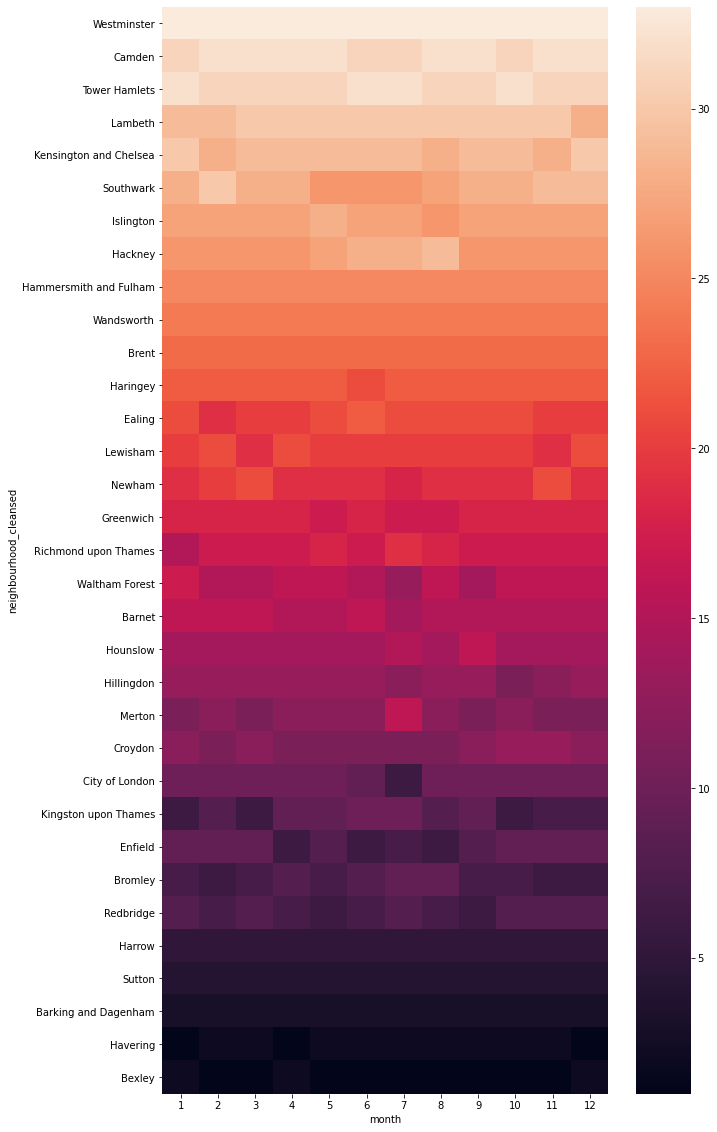

In [110]:
plt.figure(figsize=(10, 20))
sns.heatmap(top_df.loc[regions_popularity_df["neighbourhood_cleansed"].tolist()])

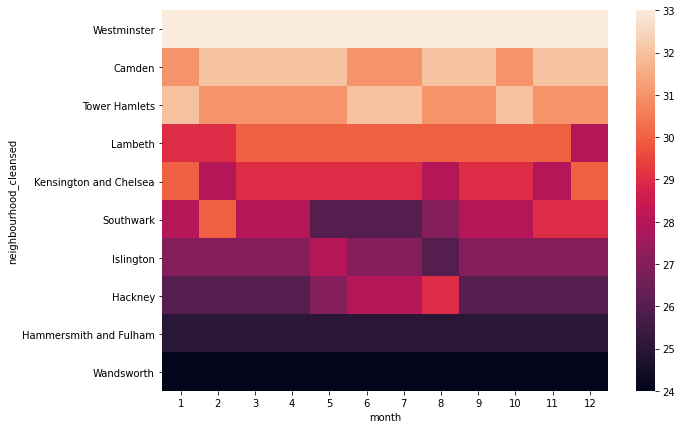

In [111]:
plt.figure(figsize=(10, 7))
sns.heatmap(top_df.loc[regions_popularity_df["neighbourhood_cleansed"].tolist()].iloc[0:10])